In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
indir = 'data/original/Scoring'
outdir = 'data/main'

In [6]:
scoring = os.listdir(indir)
scoring

['q.csv', '.DS_Store', 'p.csv', 'r.csv', 'x.csv', 'y.csv', 'z.csv']

In [5]:
df = pd.read_csv(os.path.join(indir, 'r.csv'))
df.head(1)

,ID,Source Segment,MT Target Segment,Segment Origin,Comment,Number of Words (Source Segment),Number of Words (Target Segment),Fluency,Fluency Score,Adequacy,Adequacy Score
0,1,[HEADLINE] El CIS otorga a Susana Díaz una amp...,CIS는 Susana Díaz에게 안달루시아 선거에서 대다수를 준다.,El País,NaN,14,7,Disfluent,2,Little,2


In [8]:
len(df)

253

# 평가자 전체 fluency, adequacy

In [7]:
def collect_score(flist: list, col: str):
    # .csv만 취급
    flist = [f for f in flist if f.endswith('.csv')]
    tmp = pd.DataFrame()
    for fname in flist:
        df = pd.read_csv(os.path.join(indir, fname))
        tmp[fname[0]] = df[col]
    return tmp
    
fluency = collect_score(scoring, "Fluency Score")
fluency

,q,p,r,x,y,z
0,2,4,2,3,2,4
1,1,4,2,2,2,4
2,1,2,2,2,2,3
3,2,3,4,2,2,3
4,3,4,4,3,4,4
...,...,...,...,...,...,...
248,2,3,3,3,3,3
249,4,4,4,4,4,4
250,1,2,2,3,2,3
251,4,3,4,3,4,4


In [9]:
adequacy = collect_score(scoring, "Adequacy Score")
adequacy

,q,p,r,x,y,z
0,2,3,2,3,3,2
1,1,1,2,3,3,2
2,1,3,3,2,3,3
3,2,2,3,3,3,3
4,2,3,3,3,3,4
...,...,...,...,...,...,...
248,3,3,3,3,3,3
249,3,4,3,4,4,4
250,2,2,3,3,2,3
251,3,3,4,3,3,4


In [13]:
fluency.to_csv(os.path.join(outdir, 'fluency.csv'))
adequacy.to_csv(os.path.join(outdir, 'adequacy.csv'))

In [14]:
fluency.corr()

,q,p,r,x,y,z
q,1.000000,0.497017,0.649142,0.477813,0.644911,0.342492
p,0.497017,1.000000,0.594359,0.366096,0.596188,0.362920
r,0.649142,0.594359,1.000000,0.472367,0.669568,0.381225
x,0.477813,0.366096,0.472367,1.000000,0.464217,0.390269
y,0.644911,0.596188,0.669568,0.464217,1.000000,0.309049
z,0.342492,0.362920,0.381225,0.390269,0.309049,1.000000


In [15]:
adequacy.corr()

,q,p,r,x,y,z
q,1.000000,0.572718,0.519143,0.270122,0.467813,0.553407
p,0.572718,1.000000,0.567269,0.411046,0.520615,0.549141
r,0.519143,0.567269,1.000000,0.359444,0.455958,0.514924
x,0.270122,0.411046,0.359444,1.000000,0.331740,0.313397
y,0.467813,0.520615,0.455958,0.331740,1.000000,0.503584
z,0.553407,0.549141,0.514924,0.313397,0.503584,1.000000


<Axes: >

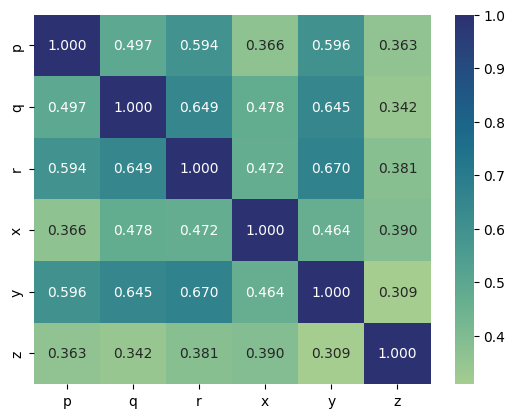

In [19]:
import seaborn as sns
sns.heatmap(fluency['p q r x y z'.split()].corr(), annot=True, fmt='.3f', cmap="crest")

<Axes: >

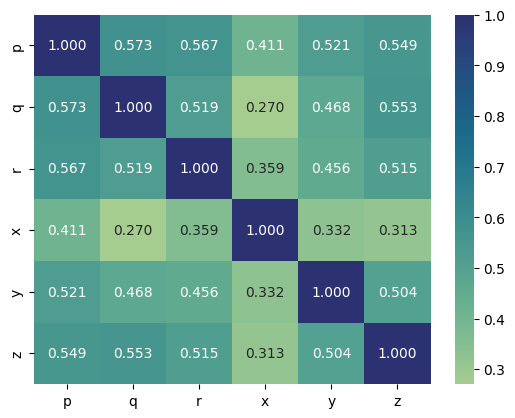

In [20]:
sns.heatmap(adequacy['p q r x y z'.split()].corr(), annot=True, fmt='.3f', cmap="crest")

## IAA

In [35]:
from sklearn.metrics import cohen_kappa_score
from itertools import combinations

def get_iaa(df):
    tmp = dict()
    combi = combinations(df.columns.tolist(), 2)
    for cb in combi:
        score = cohen_kappa_score(df[cb[0]], df[cb[1]])
        tmp[f'{cb[0]}-{cb[1]}'] = score
    return tmp

get_iaa(adequacy)

{'q-p': 0.20838894602104896,
 'q-r': 0.2861005949161709,
 'q-x': 0.06222489922624297,
 'q-y': 0.22519763549604732,
 'q-z': 0.3358490566037736,
 'p-r': 0.1703586497890296,
 'p-x': 0.12426227058794226,
 'p-y': 0.10972121322193973,
 'p-z': 0.2014314928425358,
 'r-x': 0.1868027982605407,
 'r-y': 0.288042901136243,
 'r-z': 0.2850962740685171,
 'x-y': 0.2174977139476092,
 'x-z': 0.1571211601587379,
 'y-z': 0.30247874811732567}

In [36]:
get_iaa(fluency)

{'q-p': 0.1950204699181204,
 'q-r': 0.29696081220051207,
 'q-x': 0.15743102249014596,
 'q-y': 0.24313603829193164,
 'q-z': 0.05770697778774958,
 'p-r': 0.2980432242990654,
 'p-x': 0.10892811677840952,
 'p-y': 0.38626370849547687,
 'p-z': 0.15967271548930673,
 'r-x': 0.06583672975263322,
 'r-y': 0.40341674687199225,
 'r-z': 0.1705550472705093,
 'x-y': 0.10614106462250006,
 'x-z': -0.053811847862672346,
 'y-z': 0.1930253575035884}

In [37]:
a_iaa = get_iaa(adequacy)
iaa_df = pd.DataFrame(a_iaa.values(), index=a_iaa.keys(), columns=['Adequacy'])
iaa_df['Fluency'] = get_iaa(fluency).values()
iaa_df

,Adequacy,Fluency
q-p,0.208389,0.195020
q-r,0.286101,0.296961
q-x,0.062225,0.157431
q-y,0.225198,0.243136
q-z,0.335849,0.057707
p-r,0.170359,0.298043
p-x,0.124262,0.108928
p-y,0.109721,0.386264
p-z,0.201431,0.159673
r-x,0.186803,0.065837


In [38]:
iaa_df.to_csv(os.path.join(outdir, 'iaa.scoring.csv'))

In [39]:
iaa_df.mean()

Adequacy    0.210705
Fluency     0.185888
dtype: float64

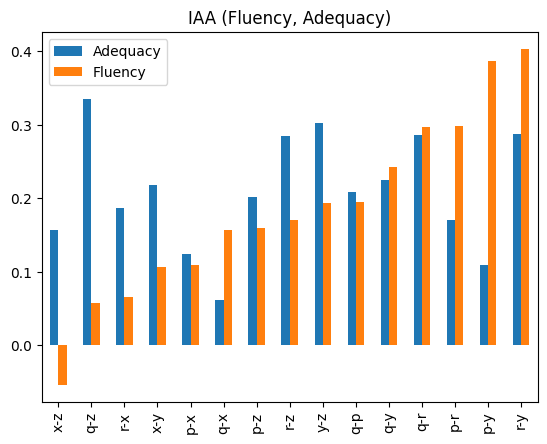

In [48]:
import matplotlib.pyplot as plt

iaa_df.sort_values('Fluency').plot(kind='bar')
plt.title('IAA (Fluency, Adequacy)')
plt.savefig(dpi=300, format='png', fname='images/iaa.png')

# 문장 길이 상관관계

In [52]:
from collections import defaultdict

tmp = defaultdict(list)
for file in scoring:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(indir, file))
        for col in ['Fluency Score', 'Adequacy Score']:
            r = df[['Number of Words (Source Segment)', col]].corr()[col][0]
            tmp[file[0]].append(r)
tmp

defaultdict(list,
            {'q': [-0.37128476147281564, -0.21910152490411572],
             'p': [-0.34966619283437805, -0.04531687955395876],
             'r': [-0.3189998911495131, -0.16788001101573227],
             'x': [-0.315710951324068, -0.09204609662387904],
             'y': [-0.4335135230212806, -0.25455927647798254],
             'z': [-0.24193546343076952, -0.29120948223784704]})

In [55]:
df_ = pd.DataFrame(tmp.values(), 
             index=tmp.keys(), 
             columns=['fluency', 'adequacy'])
df_

,fluency,adequacy
q,-0.371285,-0.219102
p,-0.349666,-0.045317
r,-0.319000,-0.167880
x,-0.315711,-0.092046
y,-0.433514,-0.254559
z,-0.241935,-0.291209


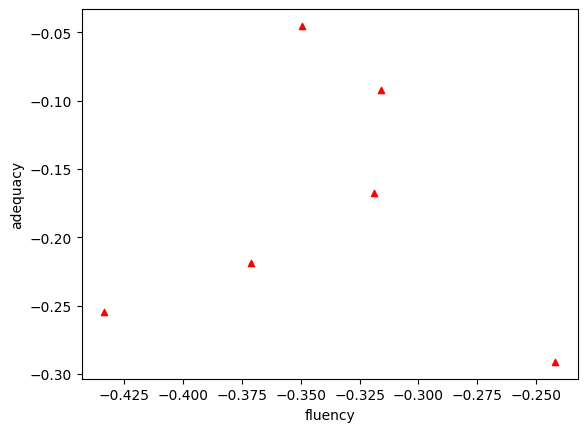

In [97]:
ax = df_.plot(kind='scatter', x='fluency', y='adequacy', marker='^', color='r')
for idx, label in enumerate(list(df_.index)): 
    for acc in df_.columns:
        value = np.round(df_.iloc[idx][acc], decimals=2)
        ax.annotate(value,
                    (idx, value),
                    xytext=(3, 3),
                    textcoords='offset points',
                   )
plt.show()

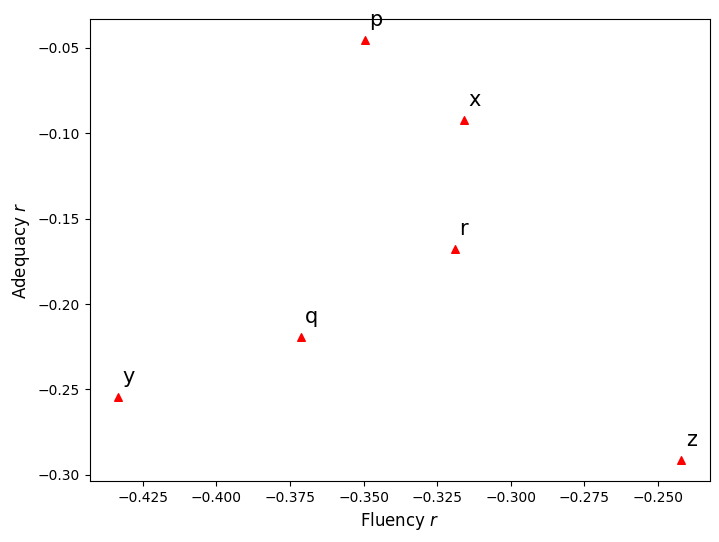

In [105]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(8, 6))
x = df_[['fluency']].values
y = df_[['adequacy']].values
annotations = df_.index.to_list()
ax.scatter(x, y, s=30, marker='^', color='r')

for xi, yi, text in zip(x, y, annotations):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(3, 10), textcoords='offset points', fontsize=15)
plt.xlabel('Fluency $r$', fontsize=12)
plt.ylabel('Adequacy $r$', fontsize=12)
plt.savefig(dpi=300, format='png', fname='images/scoring_sent_corr.png')
plt.show()

In [106]:
df_.to_csv(os.path.join(outdir, 'sent_corr.scoring.csv'))